In [1]:
import pandas as pd

df = pd.read_excel('ICICI_bank_financials.xlsx')
df.head()

,Period,SLR/Approved Securities,TotalDeposits,TotalBorrowings,TotalBorrowingsTotalAssetsRatio,CAR,GrossNPA,NetNPA,TotalInterest,ROE,ROA,NetProfit,StockClose,StockHigh,StockLow,StockOpen,StockVolume
0,2002-03-31,227927773000,320851111000,589699733000,0.557587,0.125375,70939130000,26276603000,2.136224e+10,12.079824,0.788808,2.582990e+09,NaN,NaN,NaN,NaN,NaN
1,2002-06-30,245040504000,333492177000,533919117000,0.526805,0.132976,71314495000,27602715000,2.381020e+10,14.853696,0.968568,2.528955e+09,NaN,NaN,NaN,NaN,NaN
2,2002-09-30,240437336000,359474083000,488406448000,0.482051,0.133465,73082672000,25822587000,4.643814e+10,15.584371,1.056376,5.382022e+09,18.102373,20.437747,16.786306,18.037859,119469807.0
3,2002-12-31,238272057000,413167647000,448088252000,0.436313,0.136142,75335198000,27002203000,6.885957e+10,16.578441,1.138504,8.685003e+09,18.128178,19.799067,14.115464,17.966894,213416746.0
4,2003-03-31,255830231000,481693063000,440519462000,0.404429,0.119785,74785262000,28252645000,9.252611e+10,17.073109,1.172794,1.206179e+10,17.257254,20.121637,16.986300,18.250757,246487001.0


In [2]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer_col_2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.iloc[:, 12:17] = imputer_col_2.fit_transform(df.iloc[:, 12:17])

print(df.head())

      Period  SLR/Approved Securities  TotalDeposits  TotalBorrowings  \
0 2002-03-31             227927773000   320851111000     589699733000   
1 2002-06-30             245040504000   333492177000     533919117000   
2 2002-09-30             240437336000   359474083000     488406448000   
3 2002-12-31             238272057000   413167647000     448088252000   
4 2003-03-31             255830231000   481693063000     440519462000   

   TotalBorrowingsTotalAssetsRatio       CAR     GrossNPA       NetNPA  \
0                         0.557587  0.125375  70939130000  26276603000   
1                         0.526805  0.132976  71314495000  27602715000   
2                         0.482051  0.133465  73082672000  25822587000   
3                         0.436313  0.136142  75335198000  27002203000   
4                         0.404429  0.119785  74785262000  28252645000   

   TotalInterest        ROE       ROA     NetProfit  StockClose  StockHigh  \
0   2.136224e+10  12.079824  0.788808 

#Dataset structure

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Period                           90 non-null     datetime64[ns]
 1   SLR/Approved Securities          90 non-null     int64         
 2   TotalDeposits                    90 non-null     int64         
 3   TotalBorrowings                  90 non-null     int64         
 4   TotalBorrowingsTotalAssetsRatio  90 non-null     float64       
 5   CAR                              90 non-null     float64       
 6   GrossNPA                         90 non-null     int64         
 7   NetNPA                           90 non-null     int64         
 8   TotalInterest                    90 non-null     float64       
 9   ROE                              90 non-null     float64       
 10  ROA                              90 non-null     float64       


In [4]:
print(df.describe())

                    Period  SLR/Approved Securities  TotalDeposits  \
count                   90             9.000000e+01   9.000000e+01   
mean   2013-05-15 18:56:00             1.203969e+12   4.311912e+12   
min    2002-03-31 00:00:00             2.279278e+11   3.208511e+11   
25%    2007-10-23 00:00:00             6.501243e+11   1.919227e+12   
50%    2013-05-15 12:00:00             9.391244e+11   2.741835e+12   
75%    2018-12-08 00:00:00             1.420367e+12   5.887589e+12   
max    2024-06-30 00:00:00             3.792841e+12   1.410989e+13   
std                    NaN             8.977559e+11   3.645478e+12   

       TotalBorrowings  TotalBorrowingsTotalAssetsRatio        CAR  \
count     9.000000e+01                        90.000000  90.000000   
mean      6.305439e+11                         0.155019   0.162612   
min       3.132754e+11                         0.048048   0.105650   
25%       4.066887e+11                         0.101775   0.149916   
50%       6.275412e

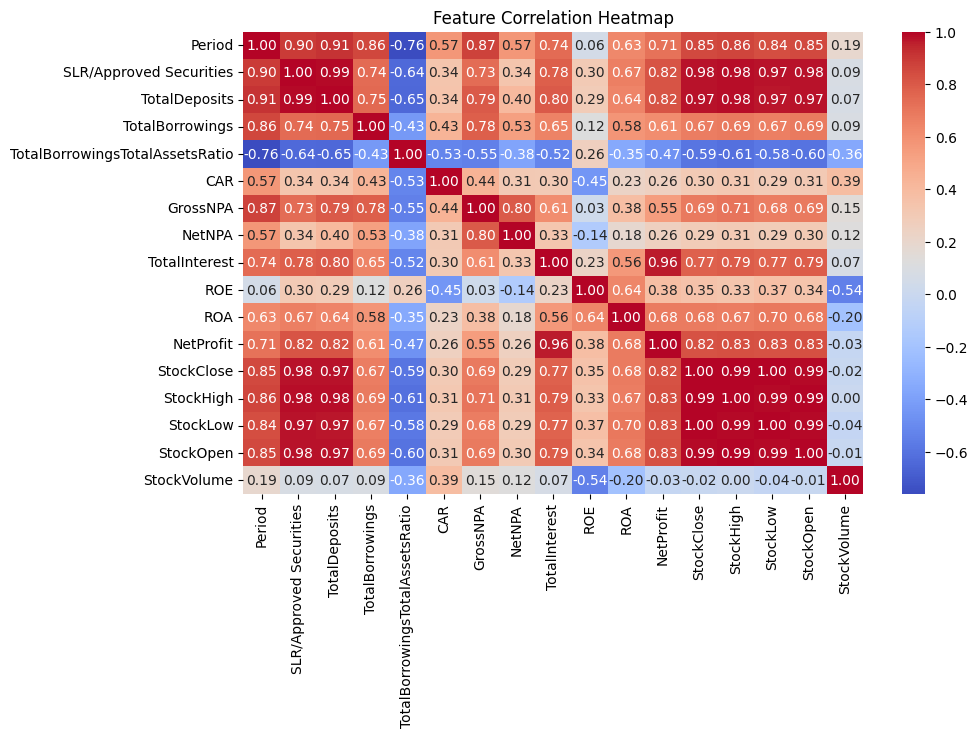

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**Inference:** From the above heat map we can see that the total borrowings to total assets ratio is negatively correlated with the stock data. As higher ratio means higher borrowings which in turn is bad for financial health and thus higher selling of stocks

<ipython-input-6-0a99126a5e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CAR'])


<Axes: xlabel='CAR', ylabel='Density'>

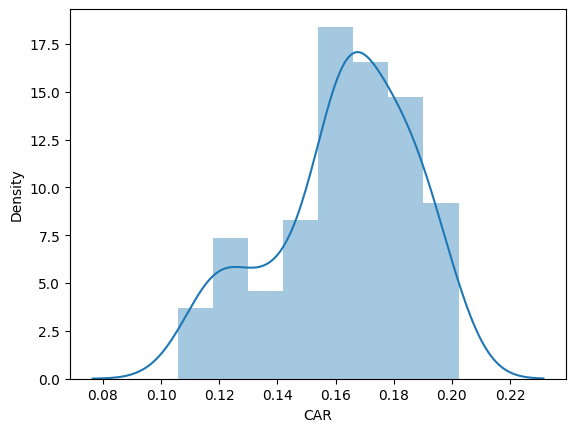

In [6]:
sns.distplot(df['CAR'])

**Inference:** We can see through the above bar plot that CAR ratio for most of the records is 0.16 and 0.17

<Axes: xlabel='CAR'>

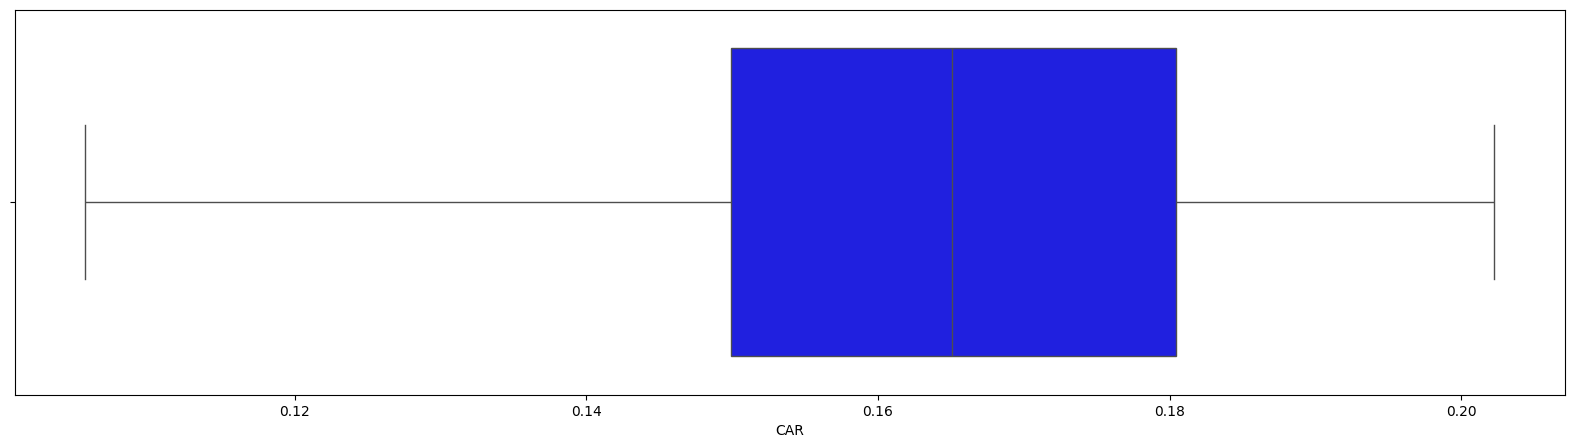

In [7]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = df['CAR'], color = 'b')

In [8]:
df['Period'] = pd.to_datetime(df['Period'], dayfirst=True)  # Convert to datetime format

def get_fiscal_year_quarter(date):
    year = date.year
    month = date.month

    # Define Fiscal Quarters
    if month in [4, 5, 6]:   # Apr - Jun
        quarter = "Q1"
        fiscal_year = f"FY{year}-{year+1}"
    elif month in [7, 8, 9]:  # Jul - Sep
        quarter = "Q2"
        fiscal_year = f"FY{year}-{year+1}"
    elif month in [10, 11, 12]:  # Oct - Dec
        quarter = "Q3"
        fiscal_year = f"FY{year}-{year+1}"
    else:  # Jan - Mar (belongs to the previous fiscal year)
        quarter = "Q4"
        fiscal_year = f"FY{year-1}-{year}"

    return f"{quarter} {fiscal_year}"

# Apply function to create the fiscal quarter column
df['Fiscal_Quarter'] = df['Period'].apply(get_fiscal_year_quarter)
print(df.head())

      Period  SLR/Approved Securities  TotalDeposits  TotalBorrowings  \
0 2002-03-31             227927773000   320851111000     589699733000   
1 2002-06-30             245040504000   333492177000     533919117000   
2 2002-09-30             240437336000   359474083000     488406448000   
3 2002-12-31             238272057000   413167647000     448088252000   
4 2003-03-31             255830231000   481693063000     440519462000   

   TotalBorrowingsTotalAssetsRatio       CAR     GrossNPA       NetNPA  \
0                         0.557587  0.125375  70939130000  26276603000   
1                         0.526805  0.132976  71314495000  27602715000   
2                         0.482051  0.133465  73082672000  25822587000   
3                         0.436313  0.136142  75335198000  27002203000   
4                         0.404429  0.119785  74785262000  28252645000   

   TotalInterest        ROE       ROA     NetProfit  StockClose  StockHigh  \
0   2.136224e+10  12.079824  0.788808 

In [9]:
df_quarterly = df.groupby("Fiscal_Quarter")["CAR"].mean().reset_index()

print(df_quarterly.head())

   Fiscal_Quarter       CAR
0  Q1 FY2002-2003  0.132976
1  Q1 FY2003-2004  0.119220
2  Q1 FY2004-2005  0.153929
3  Q1 FY2005-2006  0.122106
4  Q1 FY2006-2007  0.127486


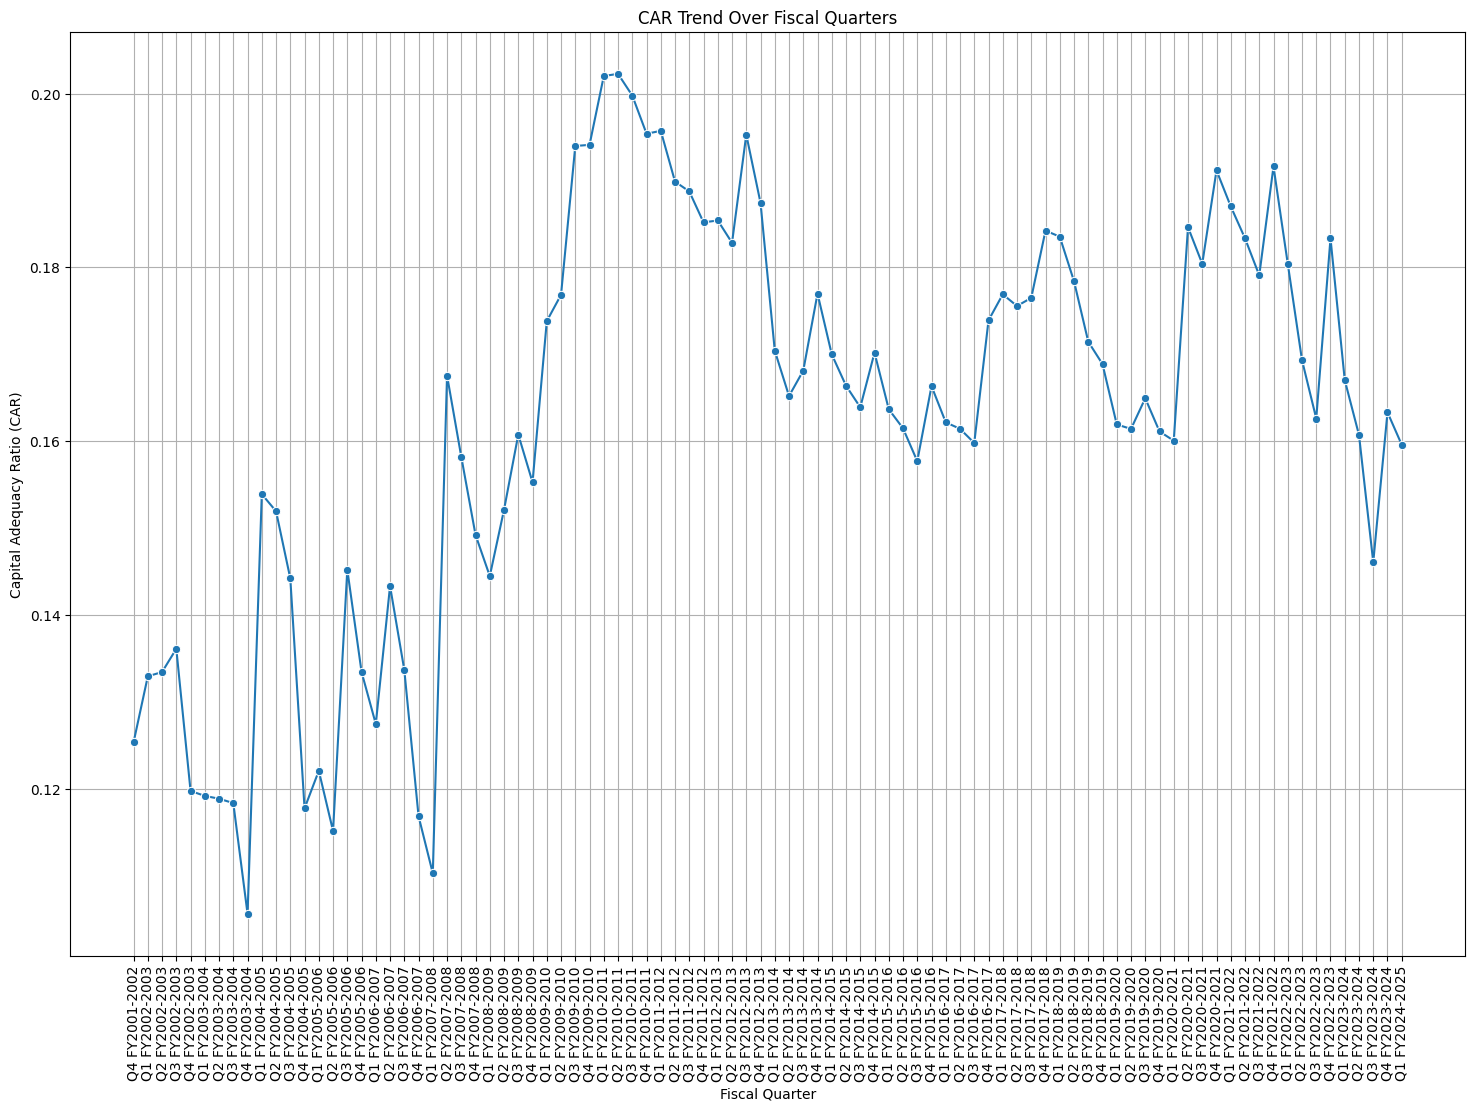

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the CAR trend
plt.figure(figsize=(18, 12))
sns.lineplot(data=df, x="Fiscal_Quarter", y="CAR", marker="o", linestyle="-")

# Formatting
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel("Fiscal Quarter")
plt.ylabel("Capital Adequacy Ratio (CAR)")
plt.title("CAR Trend Over Fiscal Quarters")
plt.grid(True)
plt.show()

**Inference:** The CAR plot over the time shows that it has a peak low at 2008-2009 and 2019-2020 financial years due to financial crisis and covid-19 periods respectively.

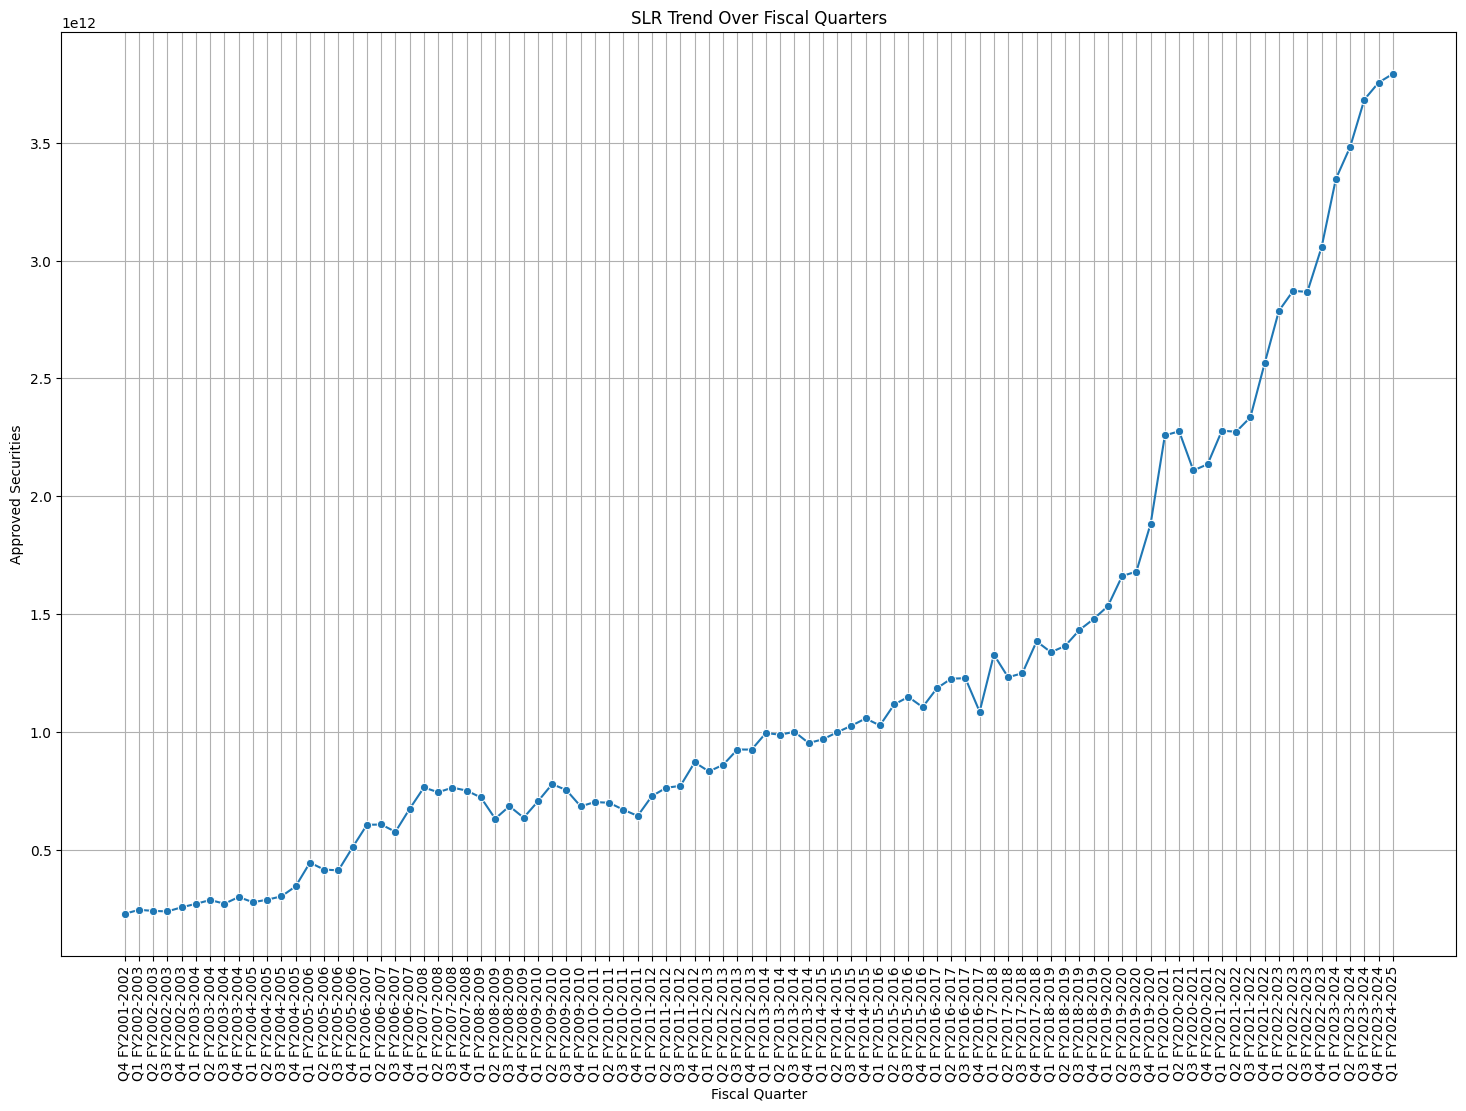

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the CAR trend
plt.figure(figsize=(18, 12))
sns.lineplot(data=df, x="Fiscal_Quarter", y="SLR/Approved Securities", marker="o", linestyle="-")

# Formatting
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel("Fiscal Quarter")
plt.ylabel("Approved Securities")
plt.title("SLR Trend Over Fiscal Quarters")
plt.grid(True)
plt.show()

**Inference:** We can see that the SLR deposits which are supposedly a safe bet for investments have peaked during 2008-2009 and 2019-2020 financial years. As SLR are considered as safe bet RBI had mandated to maintain a certain level during 2008 and 2019.

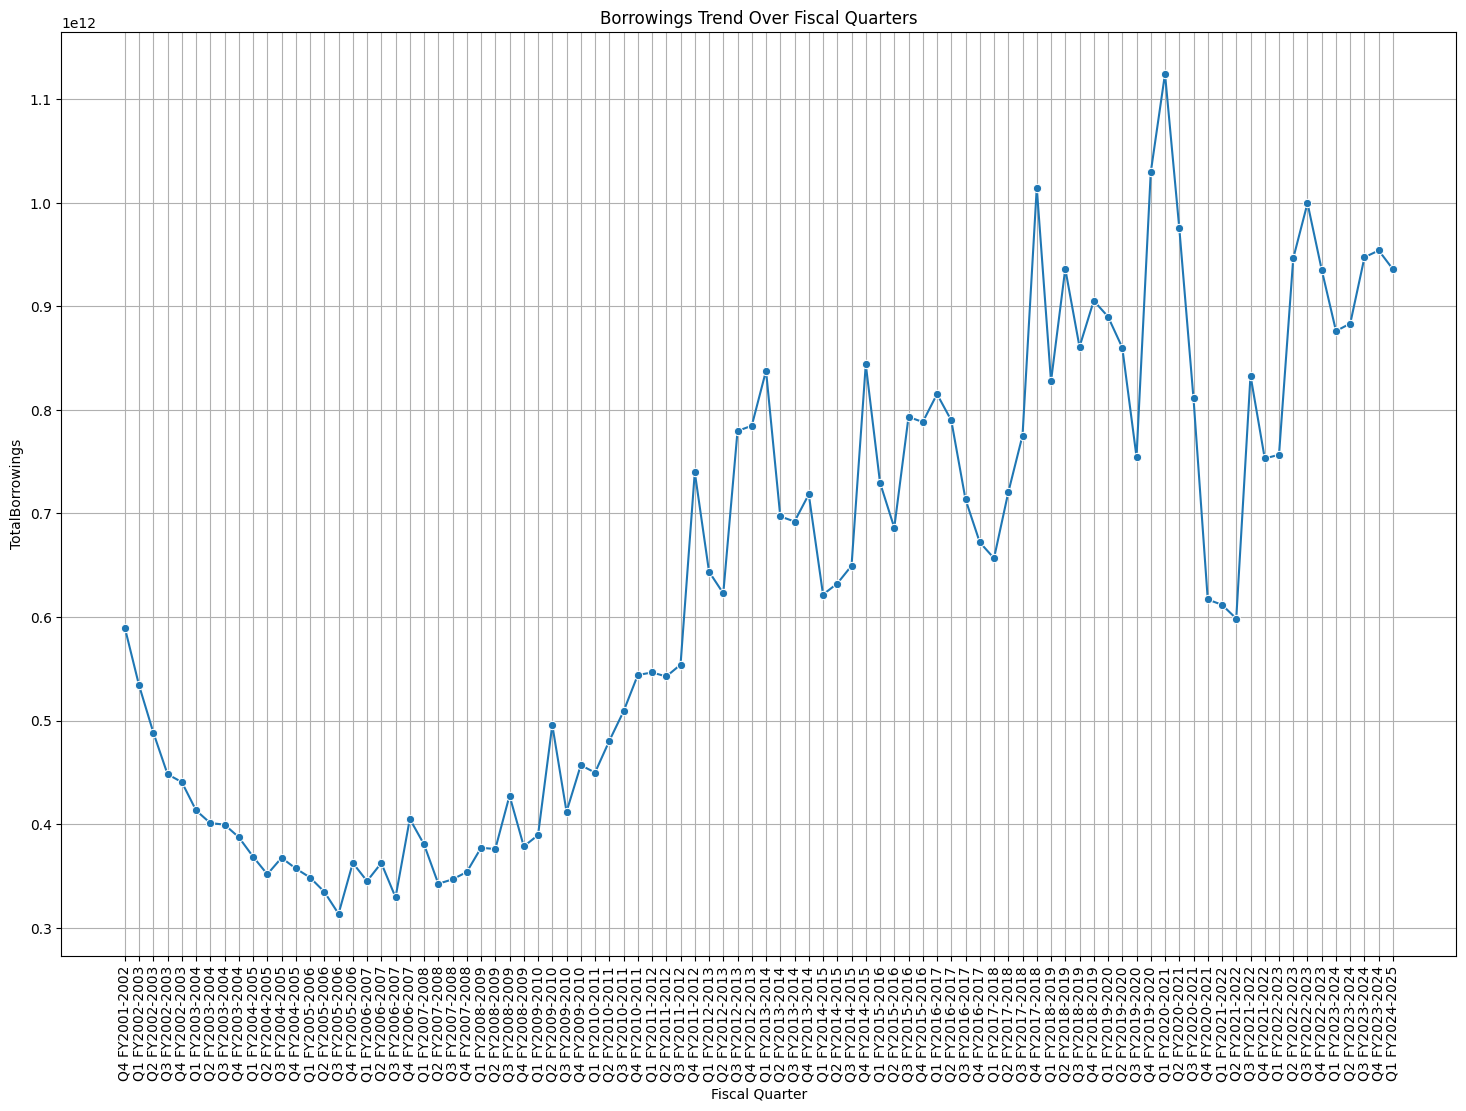

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the CAR trend
plt.figure(figsize=(18, 12))
sns.lineplot(data=df, x="Fiscal_Quarter", y="TotalBorrowings", marker="o", linestyle="-")

# Formatting
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel("Fiscal Quarter")
plt.ylabel("TotalBorrowings")
plt.title("Borrowings Trend Over Fiscal Quarters")
plt.grid(True)
plt.show()

**Inference:** We can see that the borrowings had decreased during 2008 and 2019 periods to maintain good financial health during the tough times.

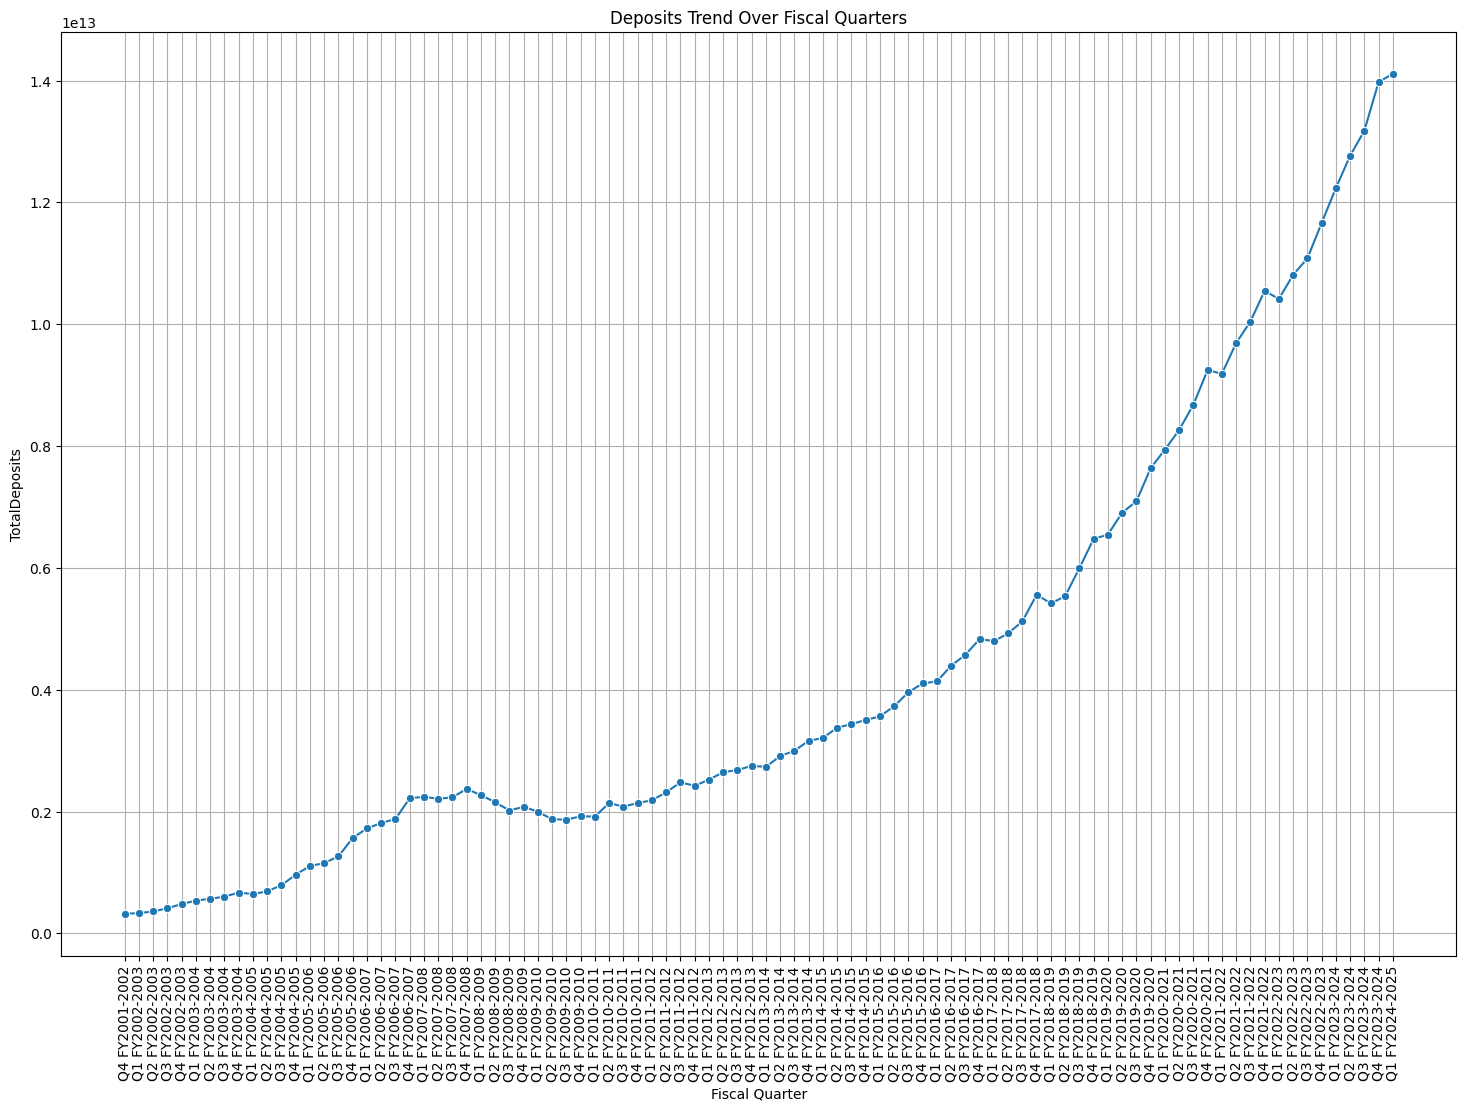

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the CAR trend
plt.figure(figsize=(18, 12))
sns.lineplot(data=df, x="Fiscal_Quarter", y="TotalDeposits", marker="o", linestyle="-")

# Formatting
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.xlabel("Fiscal Quarter")
plt.ylabel("TotalDeposits")
plt.title("Deposits Trend Over Fiscal Quarters")
plt.grid(True)
plt.show()

**Inference:** We can see that the deposits had similarly increased significantly during 2008 and 2019 financial quarters. These anomalies can be detected and flagged in case of a bank run.

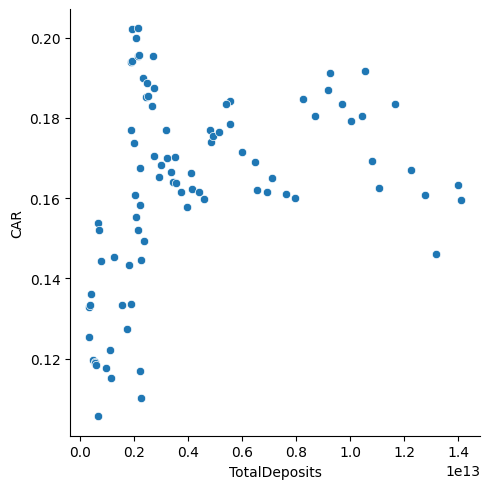

In [14]:
sns.relplot(data=df, x="TotalDeposits", y="CAR", kind="scatter")

In [15]:
%matplotlib inline
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

df = df.set_index('Period')

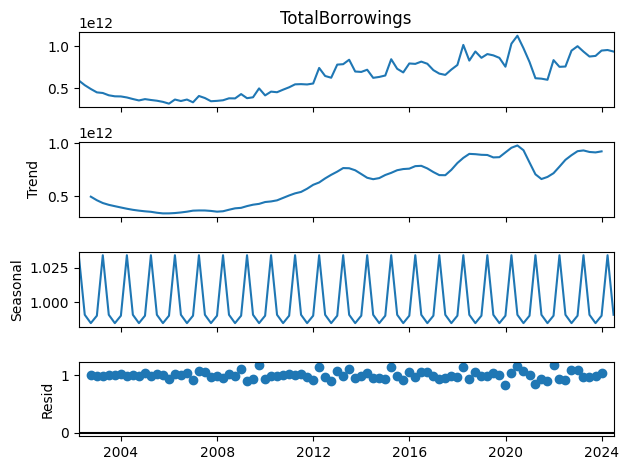

In [16]:
result = seasonal_decompose(df['TotalBorrowings'], model='multiplicative')
result.plot()
pyplot.show()

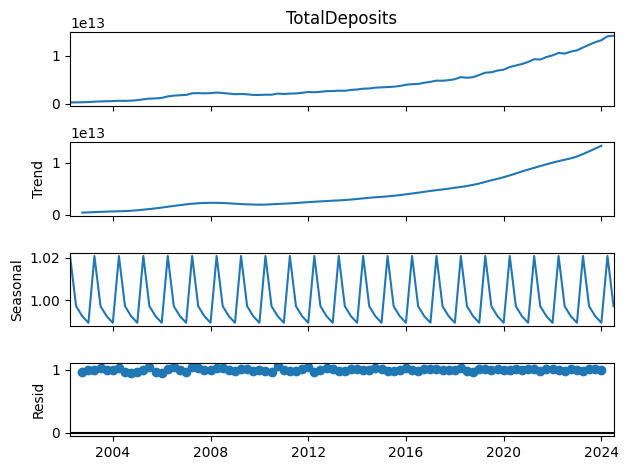

In [17]:
result = seasonal_decompose(df['TotalDeposits'], model='multiplicative')
result.plot()
pyplot.show()

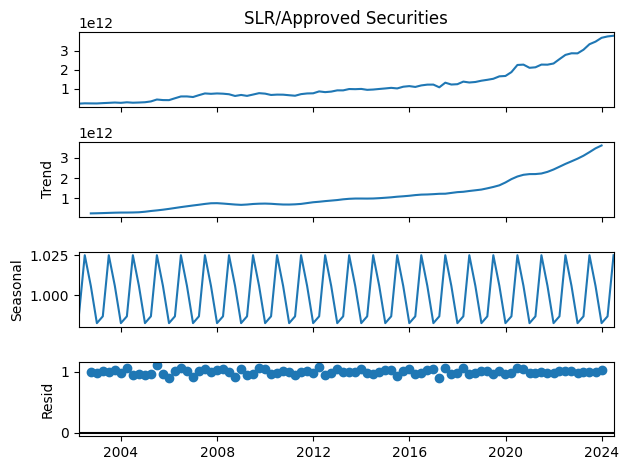

In [18]:
result = seasonal_decompose(df['SLR/Approved Securities'], model='multiplicative')
result.plot()
pyplot.show()

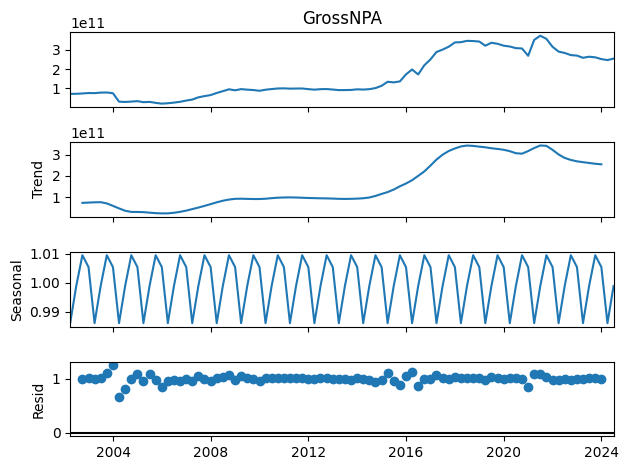

In [19]:
result = seasonal_decompose(df['GrossNPA'], model='multiplicative')
result.plot()
pyplot.show()

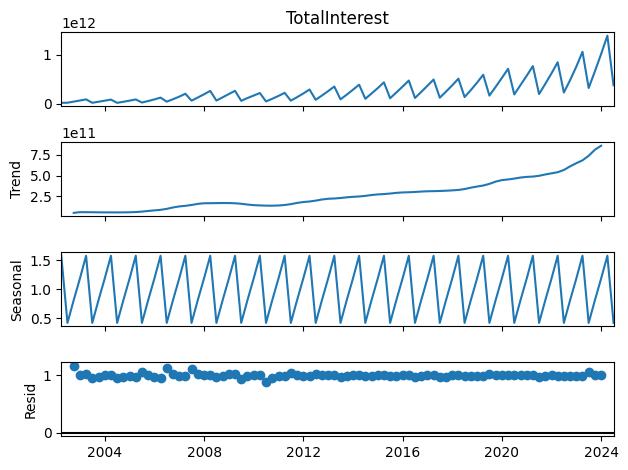

In [20]:
result = seasonal_decompose(df['TotalInterest'], model='multiplicative')
result.plot()
pyplot.show()

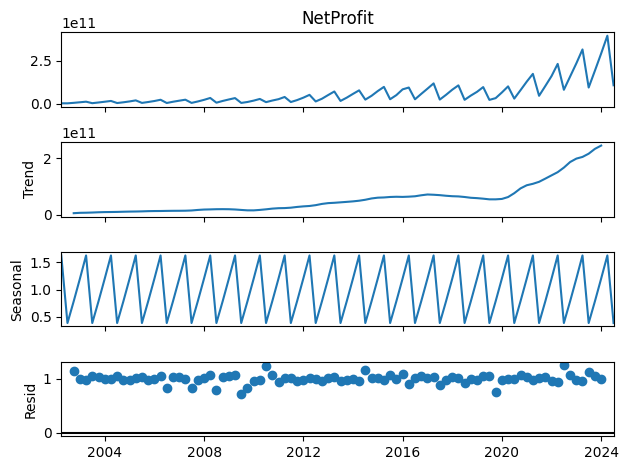

In [21]:
result = seasonal_decompose(df['NetProfit'], model='multiplicative')
result.plot()
pyplot.show()

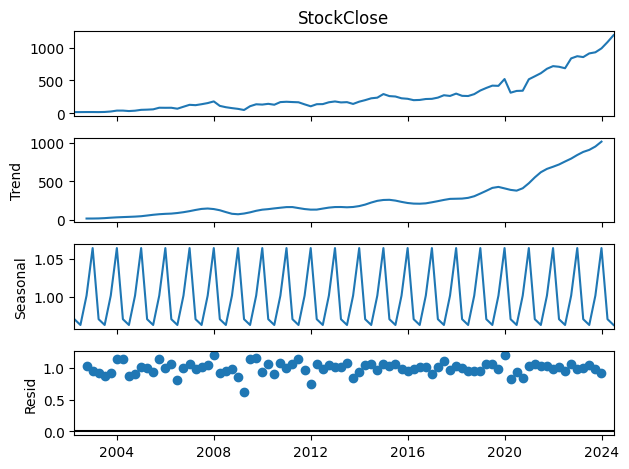

In [22]:
result = seasonal_decompose(df['StockClose'], model='multiplicative')
result.plot()
pyplot.show()

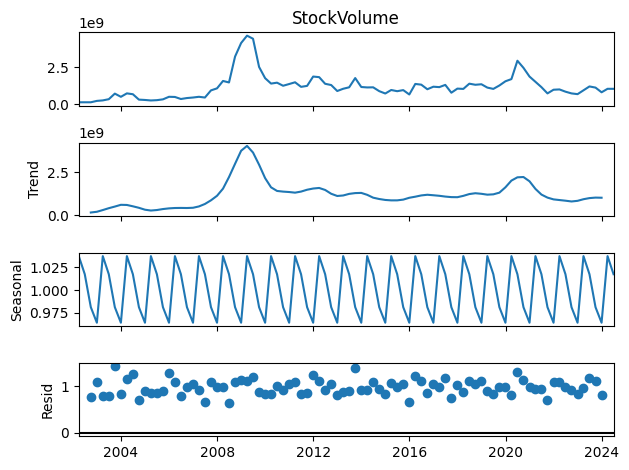

In [23]:
result = seasonal_decompose(df['StockVolume'], model='multiplicative')
result.plot()
pyplot.show()

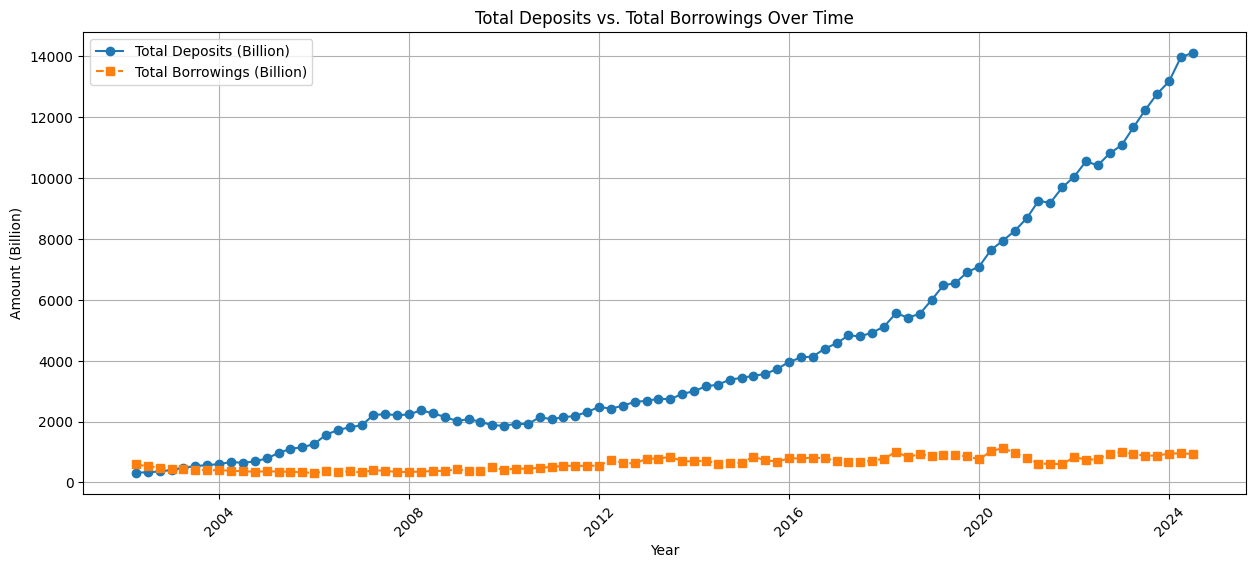

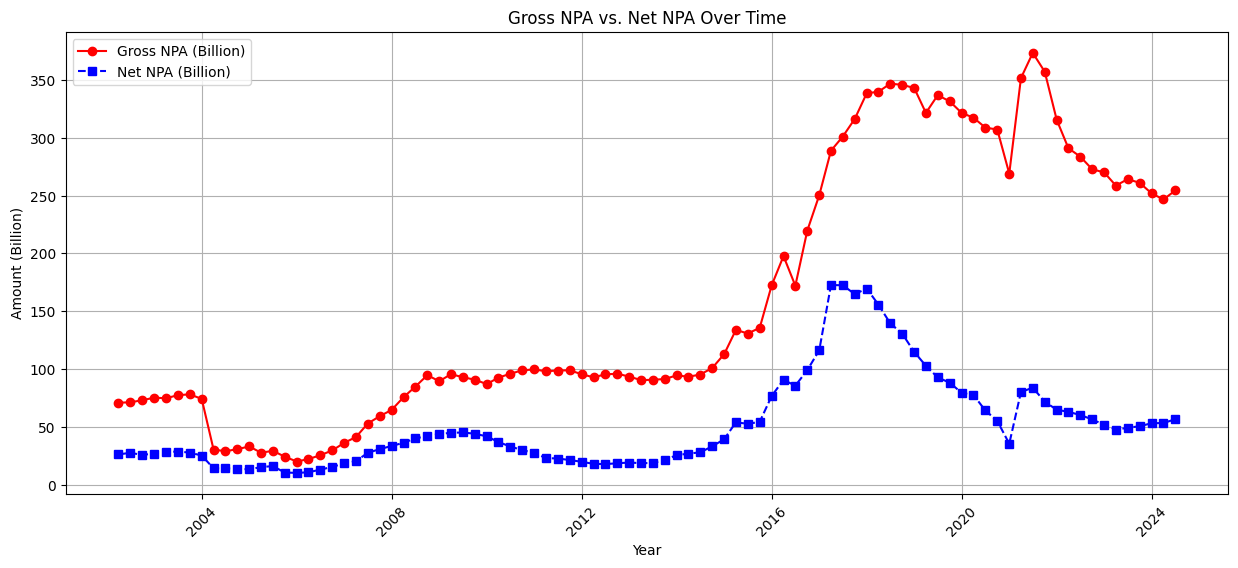

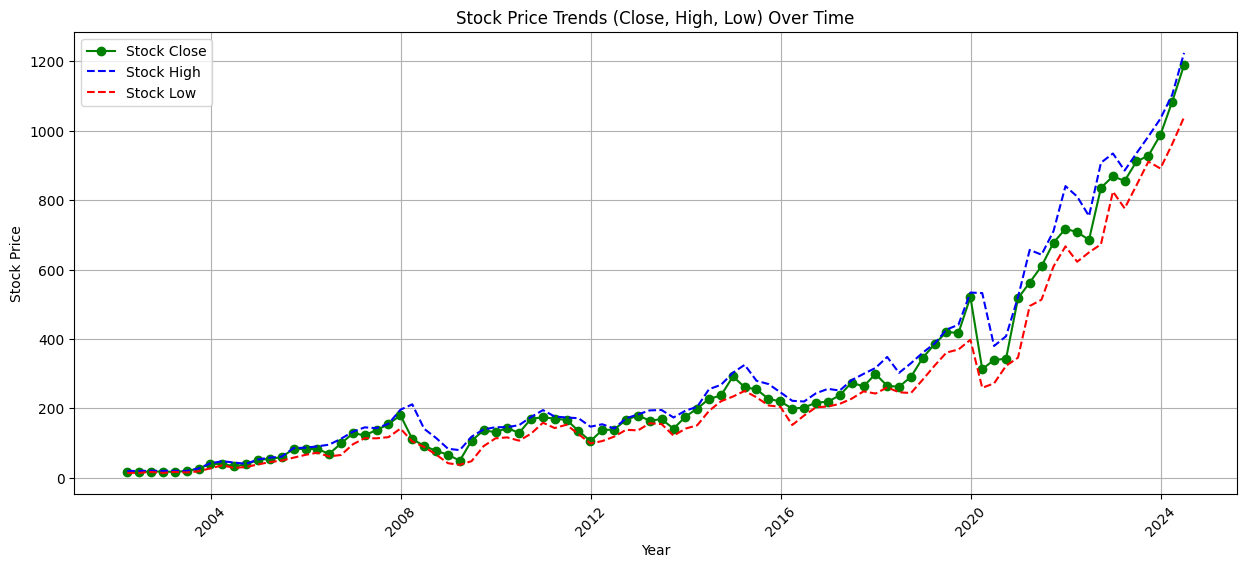

In [24]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 6))

# Plot Deposits vs Borrowings
plt.plot(df.index, df['TotalDeposits'] / 1e9, label="Total Deposits (Billion)", marker='o')
plt.plot(df.index, df['TotalBorrowings'] / 1e9, label="Total Borrowings (Billion)", marker='s', linestyle='dashed')

plt.xlabel("Year")
plt.ylabel("Amount (Billion)")
plt.title("Total Deposits vs. Total Borrowings Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot Gross NPA & Net NPA trends
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['GrossNPA'] / 1e9, label="Gross NPA (Billion)", marker='o', color='r')
plt.plot(df.index, df['NetNPA'] / 1e9, label="Net NPA (Billion)", marker='s', linestyle='dashed', color='b')

plt.xlabel("Year")
plt.ylabel("Amount (Billion)")
plt.title("Gross NPA vs. Net NPA Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot Stock Prices
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['StockClose'], label="Stock Close", marker='o', color='g')
plt.plot(df.index, df['StockHigh'], label="Stock High", linestyle='dashed', color='b')
plt.plot(df.index, df['StockLow'], label="Stock Low", linestyle='dashed', color='r')

plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.title("Stock Price Trends (Close, High, Low) Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

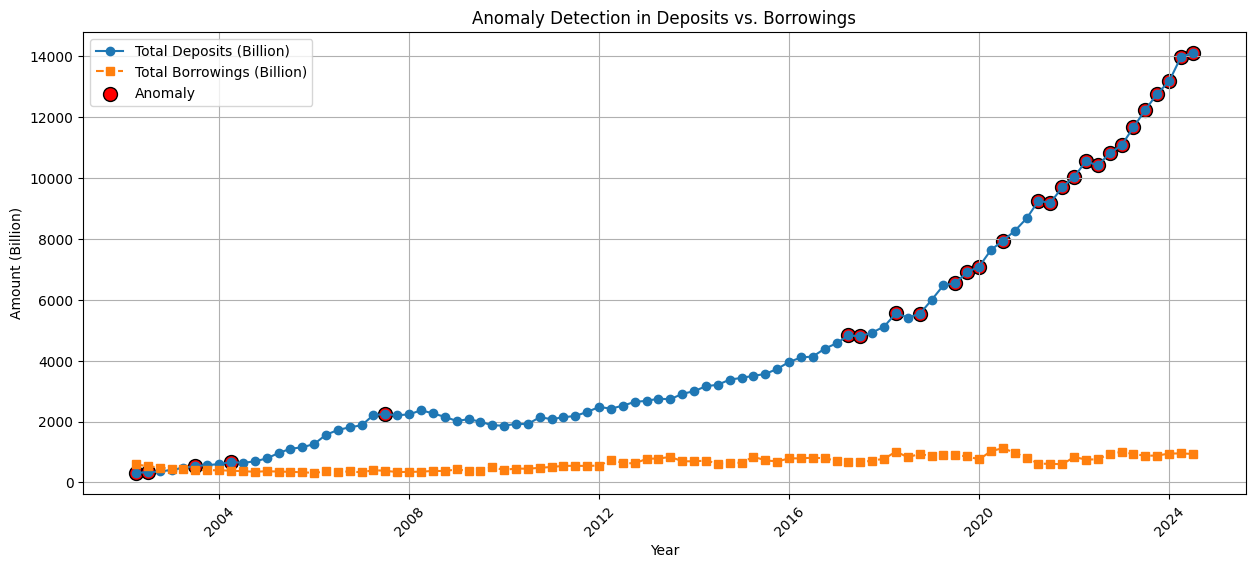

,TotalDeposits,TotalBorrowings,GrossNPA,NetProfit,StockClose
Period,,,,,
2002-03-31,320851111000,589699733000,70939130000,2.582990e+09,17.257254
2002-06-30,333492177000,533919117000,71314495000,2.528955e+09,17.257254
2003-06-30,538531643000,413183524000,77436362000,3.402081e+09,19.373278
2004-03-31,670287518000,387260821000,30475944000,1.636259e+10,40.079136
2007-06-30,2243399663000,380321515000,52920384000,5.023058e+09,137.453857
2017-03-31,4831184803000,672092513000,288818249000,1.185306e+11,237.801529
2017-06-30,4798094861000,656702927000,301067351000,2.422976e+10,274.148224
2018-03-31,5560172441000,1014639643000,339779338000,1.071445e+11,265.065918
2018-09-30,5534992540000,936265948000,345758734000,4.770794e+10,290.967773


In [25]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Selecting relevant financial indicators for anomaly detection
features = ['TotalDeposits', 'TotalBorrowings', 'TotalBorrowingsTotalAssetsRatio',
            'CAR', 'GrossNPA', 'NetNPA', 'ROE', 'ROA', 'NetProfit', 'StockClose']

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.3, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df[features])

# Identify anomalies (-1 indicates anomaly)
df_anomalies = df[df['Anomaly_Score'] == -1]

# Plot anomalies in Deposits vs. Borrowings trend
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['TotalDeposits'] / 1e9, label="Total Deposits (Billion)", marker='o')
plt.plot(df.index, df['TotalBorrowings'] / 1e9, label="Total Borrowings (Billion)", marker='s', linestyle='dashed')

# Highlight anomalies
plt.scatter(df_anomalies.index, df_anomalies['TotalDeposits'] / 1e9, color='red', label="Anomaly", s=100, edgecolors='k')

plt.xlabel("Year")
plt.ylabel("Amount (Billion)")
plt.title("Anomaly Detection in Deposits vs. Borrowings")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Show detected anomalies
df_anomalies[['TotalDeposits', 'TotalBorrowings', 'GrossNPA', 'NetProfit', 'StockClose']]

**Inference:** The scatter plot above shows the anomalies in deposits vs borrowings and similar to the above plot it shows anomalies during the 2008 and 2019 periods. The anomalies are detected using Isolation Forest algorithm. The isolation forest algorithm is a usupervised tree based algorithm used to detect outliers.

In [26]:
df = df.reset_index()

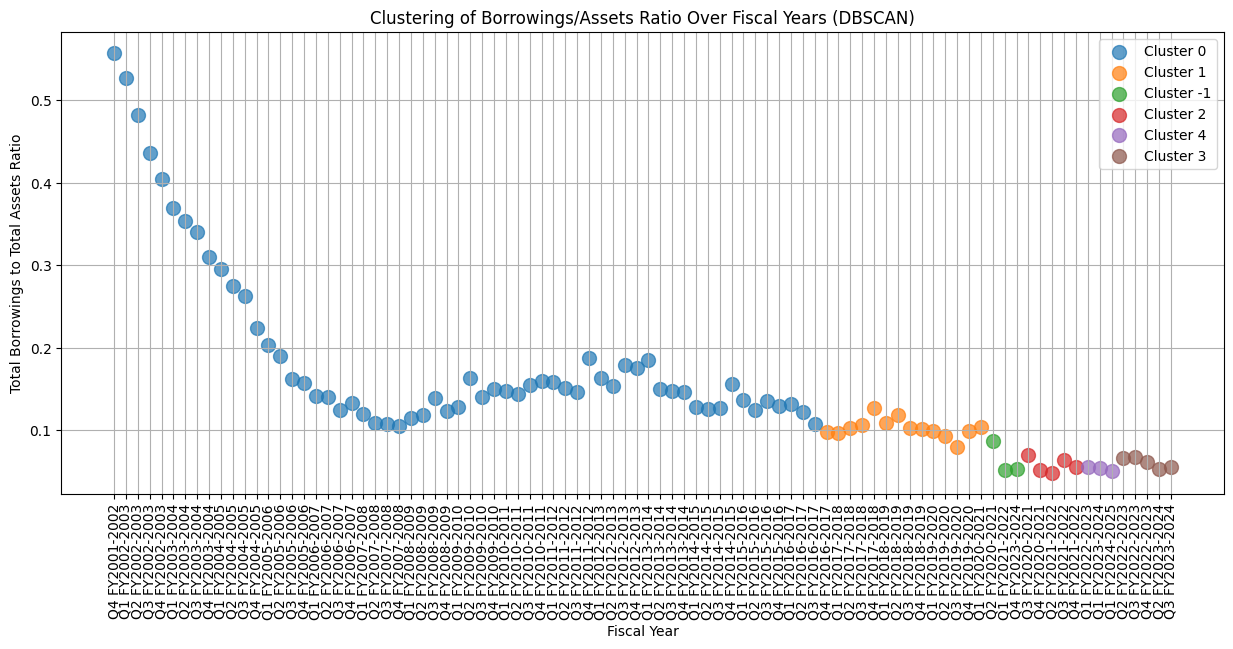

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply K-Means clustering (choosing 3 clusters as an initial assumption)
# kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# df['Cluster'] = kmeans.fit_predict(df_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Anomaly_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Unique clusters
clusters = df['Anomaly_DBSCAN'].unique()

# Plot Total Borrowings to Total Assets Ratio against Fiscal Year with Clusters
plt.figure(figsize=(15, 6))
for cluster in clusters:
    cluster_data = df[df['Anomaly_DBSCAN'] == cluster]
    plt.scatter(cluster_data['Fiscal_Quarter'], cluster_data['TotalBorrowingsTotalAssetsRatio'],
                label=f"Cluster {cluster}", s=100, alpha=0.7)

# Labels and title
plt.xticks(rotation=90)
plt.xlabel("Fiscal Year")
plt.ylabel("Total Borrowings to Total Assets Ratio")
plt.title("Clustering of Borrowings/Assets Ratio Over Fiscal Years (DBSCAN)")
plt.legend()
plt.grid(True)
plt.show()

**Inference:** The scatter plot above shows the anomalies in total borrowings to total assets ratio and similar to the above plot it shows anomalies during the 2021, 2022, 2024 periods. The anomalies are detected using DBSCAN algorithm. The DBSCAN algorithm checks for nearest neighbours using the epsilon distance and minimum points required in this distance.

In [28]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(df_scaled)

# Apply DBSCAN for clustering financial periods
dbscan = DBSCAN(eps=1.5, min_samples=3)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Count anomalies detected by Isolation Forest
anomaly_counts = df['Anomaly_IF'].value_counts()

# Show detected anomalies and clusters
df[['TotalDeposits', 'TotalBorrowings', 'GrossNPA', 'NetProfit', 'StockClose', 'Anomaly_IF', 'Cluster_DBSCAN']].head(10), anomaly_counts


(   TotalDeposits  TotalBorrowings     GrossNPA     NetProfit  StockClose  \
 0   320851111000     589699733000  70939130000  2.582990e+09   17.257254   
 1   333492177000     533919117000  71314495000  2.528955e+09   17.257254   
 2   359474083000     488406448000  73082672000  5.382022e+09   18.102373   
 3   413167647000     448088252000  75335198000  8.685003e+09   18.128178   
 4   481693063000     440519462000  74785262000  1.206179e+10   17.257254   
 5   538531643000     413183524000  77436362000  3.402081e+09   19.373278   
 6   568636540000     400921618000  78191880000  7.444484e+09   26.385847   
 7   602240781000     399443770000  74234075000  1.183744e+10   39.964146   
 8   670287518000     387260821000  30475944000  1.636259e+10   40.079136   
 9   645296428000     368526877000  28964165000  4.242845e+09   33.072380   
 
    Anomaly_IF  Cluster_DBSCAN  
 0          -1               0  
 1           1               0  
 2           1               0  
 3           1     

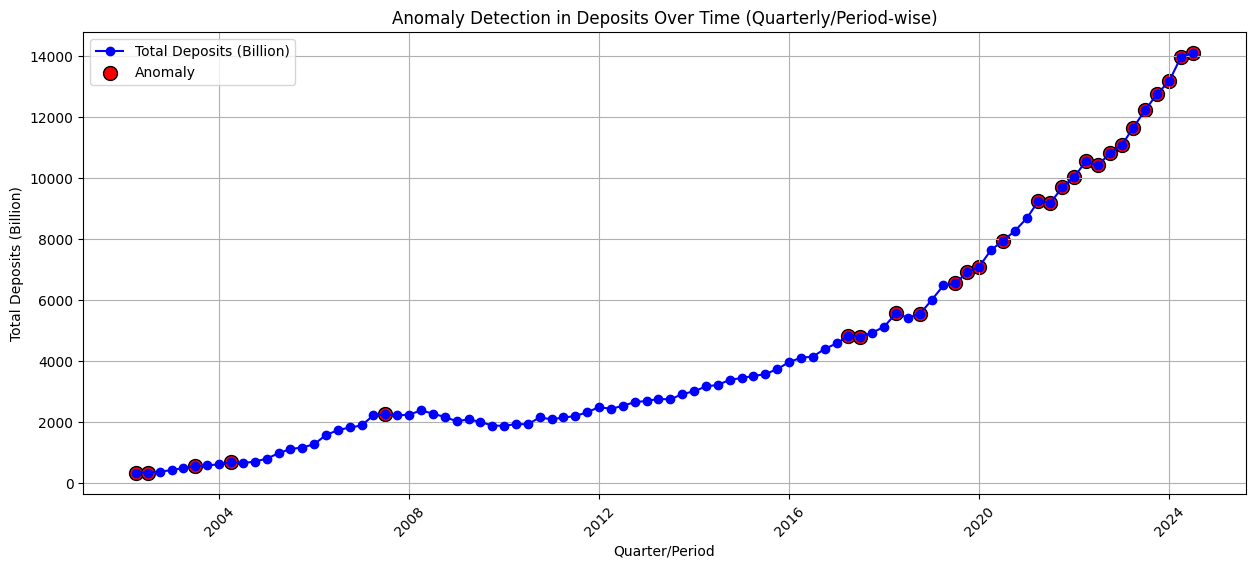

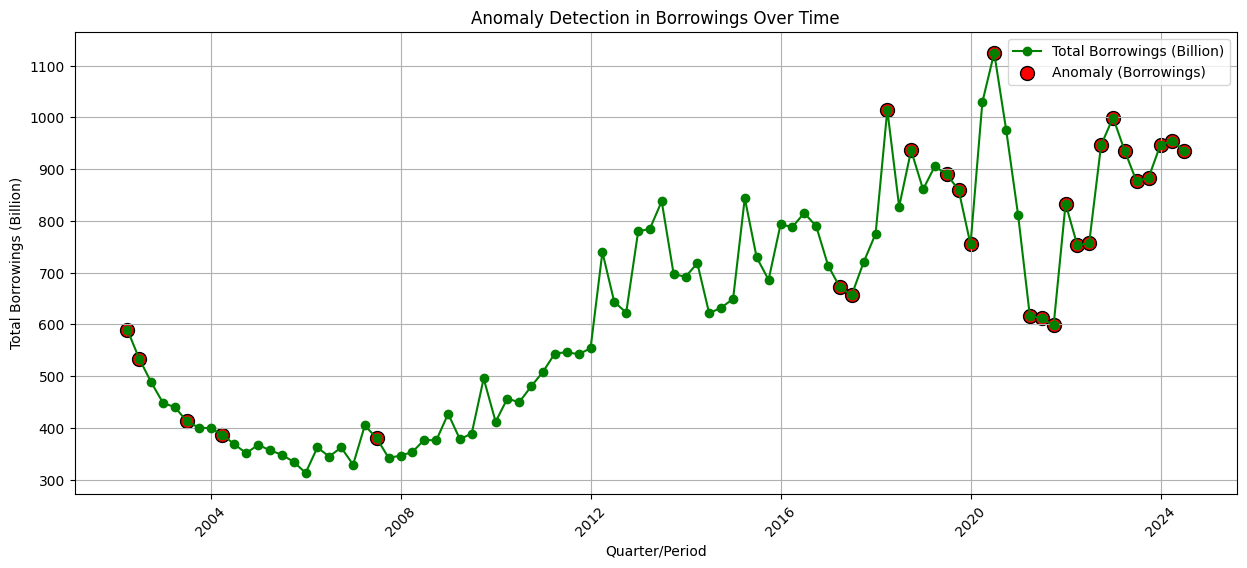

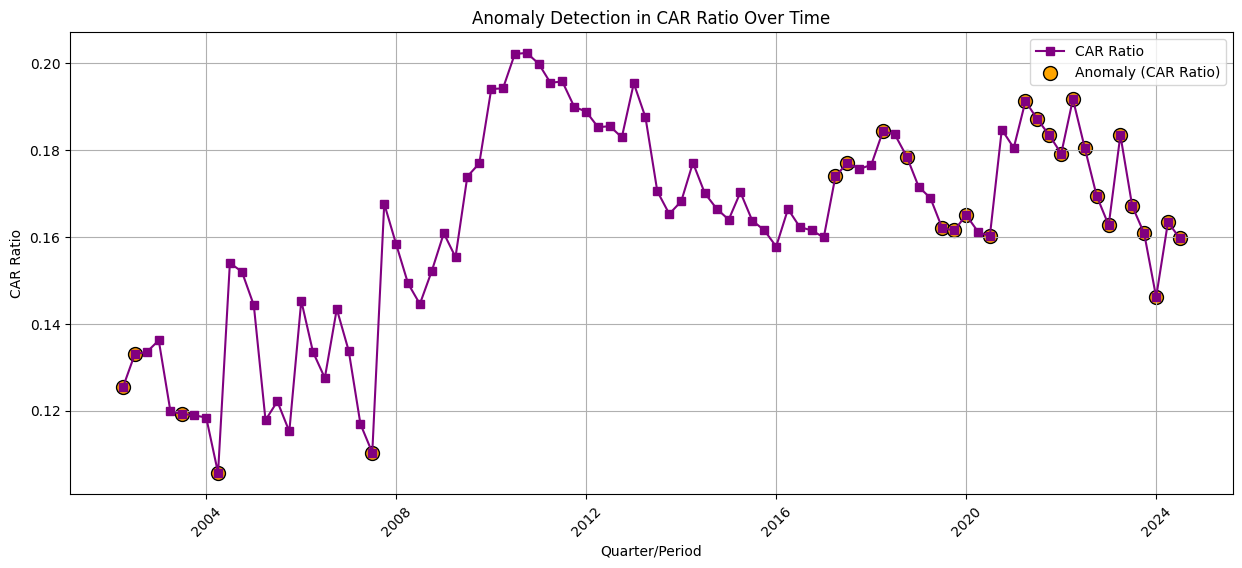

,Period,TotalDeposits,TotalBorrowings,GrossNPA,NetProfit,StockClose,CAR
0,2002-03-31,320851111000,589699733000,70939130000,2.582990e+09,17.257254,0.125375
1,2002-06-30,333492177000,533919117000,71314495000,2.528955e+09,17.257254,0.132976
5,2003-06-30,538531643000,413183524000,77436362000,3.402081e+09,19.373278,0.119220
8,2004-03-31,670287518000,387260821000,30475944000,1.636259e+10,40.079136,0.105650
21,2007-06-30,2243399663000,380321515000,52920384000,5.023058e+09,137.453857,0.110314
60,2017-03-31,4831184803000,672092513000,288818249000,1.185306e+11,237.801529,0.173920
61,2017-06-30,4798094861000,656702927000,301067351000,2.422976e+10,274.148224,0.176915
64,2018-03-31,5560172441000,1014639643000,339779338000,1.071445e+11,265.065918,0.184244
66,2018-09-30,5534992540000,936265948000,345758734000,4.770794e+10,290.967773,0.178422
69,2019-06-30,6546960355000,890009276000,336809555000,2.256071e+10,420.472412,0.161946


In [29]:
# Select features for anomaly detection
features = ['TotalDeposits', 'TotalBorrowings', 'TotalBorrowingsTotalAssetsRatio',
            'CAR', 'GrossNPA', 'NetNPA', 'ROE', 'ROA', 'NetProfit', 'StockClose']

df_clean = df[features].fillna(df[features].median())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.3, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df_scaled)

# Identify anomalies (-1 indicates an anomaly)
df_anomalies = df[df['Anomaly_Score'] == -1]

# Plot anomalies over time
plt.figure(figsize=(15, 6))
plt.plot(df['Period'], df['TotalDeposits'] / 1e9, label="Total Deposits (Billion)", marker='o', linestyle='-', color='blue')
plt.scatter(df_anomalies['Period'], df_anomalies['TotalDeposits'] / 1e9, color='red', label="Anomaly", s=100, edgecolors='k')

plt.xlabel("Quarter/Period")
plt.ylabel("Total Deposits (Billion)")
plt.title("Anomaly Detection in Deposits Over Time (Quarterly/Period-wise)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot Total Borrowings with anomalies
plt.figure(figsize=(15, 6))
plt.plot(df['Period'], df['TotalBorrowings'] / 1e9, label="Total Borrowings (Billion)", marker='o', linestyle='-', color='green')
plt.scatter(df_anomalies['Period'], df_anomalies['TotalBorrowings'] / 1e9, color='red', label="Anomaly (Borrowings)", s=100, edgecolors='k')

plt.xlabel("Quarter/Period")
plt.ylabel("Total Borrowings (Billion)")
plt.title("Anomaly Detection in Borrowings Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot CAR Ratio with anomalies
plt.figure(figsize=(15, 6))
plt.plot(df['Period'], df['CAR'], label="CAR Ratio", marker='s', linestyle='-', color='purple')
plt.scatter(df_anomalies['Period'], df_anomalies['CAR'], color='orange', label="Anomaly (CAR Ratio)", s=100, edgecolors='k')

plt.xlabel("Quarter/Period")
plt.ylabel("CAR Ratio")
plt.title("Anomaly Detection in CAR Ratio Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display detected anomalies
df_anomalies[['Period', 'TotalDeposits', 'TotalBorrowings', 'GrossNPA', 'NetProfit', 'StockClose', 'CAR']]

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.3, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Anomaly_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df['Anomaly_KMeans'] = kmeans.fit_predict(df_scaled)

# Convert anomaly labels (-1 for anomaly, 1 for normal) to binary (0 = normal, 1 = anomaly)
df['Anomaly_IsolationForest'] = (df['Anomaly_Score'] == -1).astype(int)
df['Anomaly_DBSCAN'] = (df['Anomaly_DBSCAN'] == -1).astype(int)
df['Anomaly_KMeans'] = (df['Anomaly_KMeans'] == -1).astype(int)

# Choose Isolation Forest as the "ground truth" for evaluation (or manually labeled data if available)
true_labels = df['Anomaly_IsolationForest']

# Calculate precision, recall, and F1-score for Isolation Forest
precision_iso = precision_score(true_labels, df['Anomaly_IsolationForest'], zero_division=1)
recall_iso = recall_score(true_labels, df['Anomaly_IsolationForest'], zero_division=1)
f1_iso = f1_score(true_labels, df['Anomaly_IsolationForest'], zero_division=1)

# Calculate precision, recall, and F1-score for DBSCAN
precision_dbscan = precision_score(true_labels, df['Anomaly_DBSCAN'], zero_division=1)
recall_dbscan = recall_score(true_labels, df['Anomaly_DBSCAN'], zero_division=1)
f1_dbscan = f1_score(true_labels, df['Anomaly_DBSCAN'], zero_division=1)

# Calculate precision, recall, and F1-score for K-Means
precision_kmeans = precision_score(true_labels, df['Anomaly_KMeans'], zero_division=1)
recall_kmeans = recall_score(true_labels, df['Anomaly_KMeans'], zero_division=1)
f1_kmeans = f1_score(true_labels, df['Anomaly_KMeans'], zero_division=1)

# Print evaluation results
print(f"Isolation Forest - Precision: {precision_iso:.2f}, Recall: {recall_iso:.2f}, F1-score: {f1_iso:.2f}")
print(f"DBSCAN - Precision: {precision_dbscan:.2f}, Recall: {recall_dbscan:.2f}, F1-score: {f1_dbscan:.2f}")
print(f"K-Means - Precision: {precision_kmeans:.2f}, Recall: {recall_kmeans:.2f}, F1-score: {f1_kmeans:.2f}")

Isolation Forest - Precision: 1.00, Recall: 1.00, F1-score: 1.00
DBSCAN - Precision: 0.67, Recall: 0.07, F1-score: 0.13
K-Means - Precision: 1.00, Recall: 0.00, F1-score: 0.00


**Inferences:** The inference through the accuracy metrics is that the DBSCAN algorithm is 67% accurate and Isolation forest algorithm is 100% accurate which maybe a sign of overfitting.